# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** M. Fikri
- **Email:** muhammadfikri4402@gmail.com
- **ID Dicoding:** clayshere

## Menentukan Pertanyaan Bisnis

- Apa keterkaitan antara musim dan jumlah penyewaan sepeda setiap harinya?
- Adakah pola tertentu yang terlihat berdasarkan waktu dalam jumlah penyewaan sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day

In [20]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [21]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua tabel tersebut memiliki struktur yang sama, hanya saja untuk tabel hour terdapat 1 tambahan kolom yaitu hr.

### Assessing Data

Menilai ```day_df```

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [23]:
print(f"Jumlah duplikasi: {day_df.duplicated().sum()}")
day_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai ```hour_df```

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [25]:
print(f"Jumlah duplikasi: {hour_df.duplicated().sum()}")
hour_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari pengecekan data diatas, dapat dilihat bahwa tidak ada missing value dan tidak ada duplikasi.
- Tipe data pada kolom dteday masih kurang tepat karna seharusnya bukan object ,tetapi datetime.

### Cleaning Data

Mengubah tipe data dari dteday menjadi datetime

In [26]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [28]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kedua tabel sudah memiliki tipe data yang sesuai dan siap untuk digunakan.

Mengubah value tipe data dari kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' menjadi category dan juga mengubah valuenya

In [29]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [31]:
# Konversi season
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Konversi mnth
day_df['mnth'] = day_df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                                         7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hour_df['mnth'] = hour_df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                                           7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Konversi weathersit
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'})

# Konversi weekday
day_df['weekday'] = day_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
                                               5: 'Friday', 6: 'Saturday'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
                                                 5: 'Friday', 6: 'Saturday'})

# Konversi yr
day_df['yr'] = day_df['yr'].replace({0: '2011', 1: '2012'})
hour_df['yr'] = hour_df['yr'].replace({0: '2011', 1: '2012'})


## Exploratory Data Analysis (EDA)

Jika dilihat dari kedua tabel kita bisa menggabungkan keduanya menjadi 1 tabel

In [32]:
all_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_day', '_hour'))
all_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,Springer,2011,Jan,0,Saturday,0,Misty,0.344167,...,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Springer,2011,Jan,0,Saturday,0,Misty,0.344167,...,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Springer,2011,Jan,0,Saturday,0,Misty,0.344167,...,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Springer,2011,Jan,0,Saturday,0,Misty,0.344167,...,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Springer,2011,Jan,0,Saturday,0,Misty,0.344167,...,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


### Explore ...

In [33]:
all_df.describe(include='all')

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379,17379,17379,17379.0,17379,17379.000000,17379,17379.000000,...,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,2.0,7,NaN,3,NaN,...,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,0.0,Saturday,NaN,Clear,NaN,...,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,16879.0,2512,NaN,11040,NaN,...,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,0.682721,NaN,0.496987,...,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,...,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.340000,...,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.502500,...,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655833,...,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,...,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mengelompokkan data berdasrkan ```season_day```

In [34]:
agg_day_df = all_df.groupby(by="season_day").agg({
    "workingday_day": "count",
    "windspeed_day": [
        "mean", 
        "max", 
        "min", 
        lambda x: x.max() - x.min()
    ]
}).reset_index()

agg_day_df.columns = ['season_day', 'count_workingday', 'windspeed_mean', 'windspeed_max', 'windspeed_min', 'windspeed_range']

agg_day_df.head()

C:\Users\muham\AppData\Local\Temp\ipykernel_14680\1000079799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_day_df = all_df.groupby(by="season_day").agg({


,season_day,count_workingday,windspeed_mean,windspeed_max,windspeed_min,windspeed_range
0,Springer,4242,0.215107,0.507463,0.045408,0.462055
1,Summer,4409,0.203410,0.388067,0.065929,0.322138
2,Fall,4496,0.171593,0.375617,0.064071,0.311546
3,Winter,4232,0.170819,0.422275,0.022392,0.399883


Mengelompokkan data berdasrkan ```season_hour```

In [35]:
agg_hour_df = all_df.groupby(by="season_hour").agg({
    "workingday_hour": "count",
    "windspeed_hour": [
        "mean", 
        "max", 
        "min", 
        lambda x: x.max() - x.min()
    ]
}).reset_index()

agg_hour_df.columns = ['season_hour', 'count_workingday', 'windspeed_mean', 'windspeed_max', 'windspeed_min', 'windspeed_range']

agg_hour_df.head()

C:\Users\muham\AppData\Local\Temp\ipykernel_14680\3769403286.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_hour_df = all_df.groupby(by="season_hour").agg({


,season_hour,count_workingday,windspeed_mean,windspeed_max,windspeed_min,windspeed_range
0,Springer,4242,0.215107,0.8060,0.0,0.8060
1,Summer,4409,0.203410,0.7164,0.0,0.7164
2,Fall,4496,0.171593,0.8507,0.0,0.8507
3,Winter,4232,0.170819,0.6418,0.0,0.6418


Melihat korelasi antar data setiap hari

In [36]:
all_df.corr(numeric_only=True)

,instant_day,workingday_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,instant_hour,hr,workingday_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
instant_day,1.000000,-0.003366,0.143615,0.145524,0.013874,-0.118285,0.274026,0.666666,0.635172,0.999995,-0.006161,-0.003366,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
workingday_day,-0.003366,1.000000,0.058460,0.057839,0.021347,-0.018746,-0.517844,0.314491,0.068216,-0.003416,0.002285,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp_day,0.143615,0.058460,1.000000,0.991608,0.131257,-0.161577,0.539726,0.536407,0.625232,0.143514,-0.007823,0.058460,0.947491,0.937229,0.096457,-0.101965,0.312517,0.225692,0.273276
atemp_day,0.145524,0.057839,0.991608,1.000000,0.144272,-0.187460,0.540420,0.540841,0.629054,0.145394,-0.007840,0.057839,0.939540,0.945161,0.106022,-0.118299,0.312873,0.227536,0.274911
hum_day,0.013874,0.021347,0.131257,0.144272,1.000000,-0.258150,-0.071614,-0.081968,-0.091657,0.013548,-0.001111,0.021347,0.124365,0.136360,0.734874,-0.162909,-0.041860,-0.034857,-0.040465
windspeed_day,-0.118285,-0.018746,-0.161577,-0.187460,-0.258150,1.000000,-0.165846,-0.213500,-0.231340,-0.118361,-0.000113,-0.018746,-0.153093,-0.177180,-0.189708,0.631062,-0.094783,-0.089405,-0.100367
casual_day,0.274026,-0.517844,0.539726,0.540420,-0.071614,-0.165846,1.000000,0.386692,0.669199,0.274124,-0.005508,-0.517844,0.511386,0.510784,-0.052628,-0.104659,0.579286,0.162269,0.292866
registered_day,0.666666,0.314491,0.536407,0.540841,-0.081968,-0.213500,0.386692,1.000000,0.944052,0.666838,-0.008389,0.314491,0.508241,0.511182,-0.060236,-0.134732,0.222670,0.422071,0.412720
cnt_day,0.635172,0.068216,0.625232,0.629054,-0.091657,-0.231340,0.669199,0.944052,1.000000,0.635346,-0.008729,0.068216,0.592402,0.594557,-0.067356,-0.145990,0.386582,0.398120,0.437289
instant_hour,0.999995,-0.003416,0.143514,0.145394,0.013548,-0.118361,0.274124,0.666838,0.635346,1.000000,-0.004775,-0.003416,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379


**Insight:**
- Terlihat bahwa jumlah penyewa memiliki korelasi yang negatif terhadap hari libur, hari biasa, cuaca, dan kecepatan angin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa keterkaitan antara musim dan jumlah penyewaan sepeda setiap harinya?

C:\Users\muham\AppData\Local\Temp\ipykernel_14680\4112602269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_penyewa = all_df.groupby('season_day')['cnt_day'].mean()


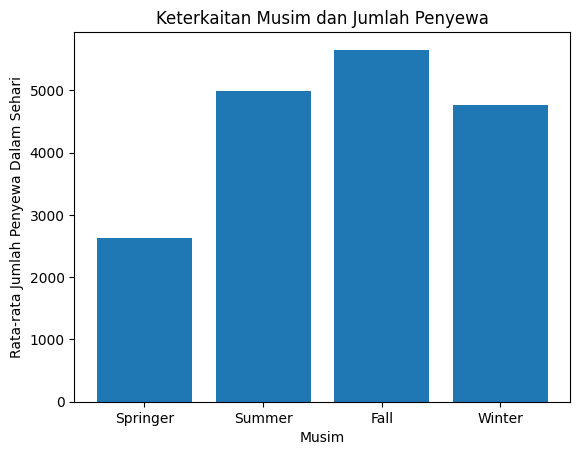

In [39]:
jumlah_penyewa = all_df.groupby('season_day')['cnt_day'].mean()
plt.bar(jumlah_penyewa.index, jumlah_penyewa.values)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewa Dalam Sehari')
plt.title('Keterkaitan Musim dan Jumlah Penyewa')
plt.show()

**Insight:**
- Dari hasil visualisasi diatas terlihat bahwa jumlah penyewa paling banyak ada pada musim gugur(Fall)


### Pertanyaan 2: Adakah pola tertentu yang terlihat berdasarkan waktu dalam jumlah penyewaan sepeda harian?

C:\Users\muham\AppData\Local\Temp\ipykernel_14680\2867536393.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="mnth_day", y="cnt_day", data=all_df, ci=None,ax=ax[0])
C:\Users\muham\AppData\Local\Temp\ipykernel_14680\2867536393.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt_hour", data=all_df, ci=None,ax=ax[1])


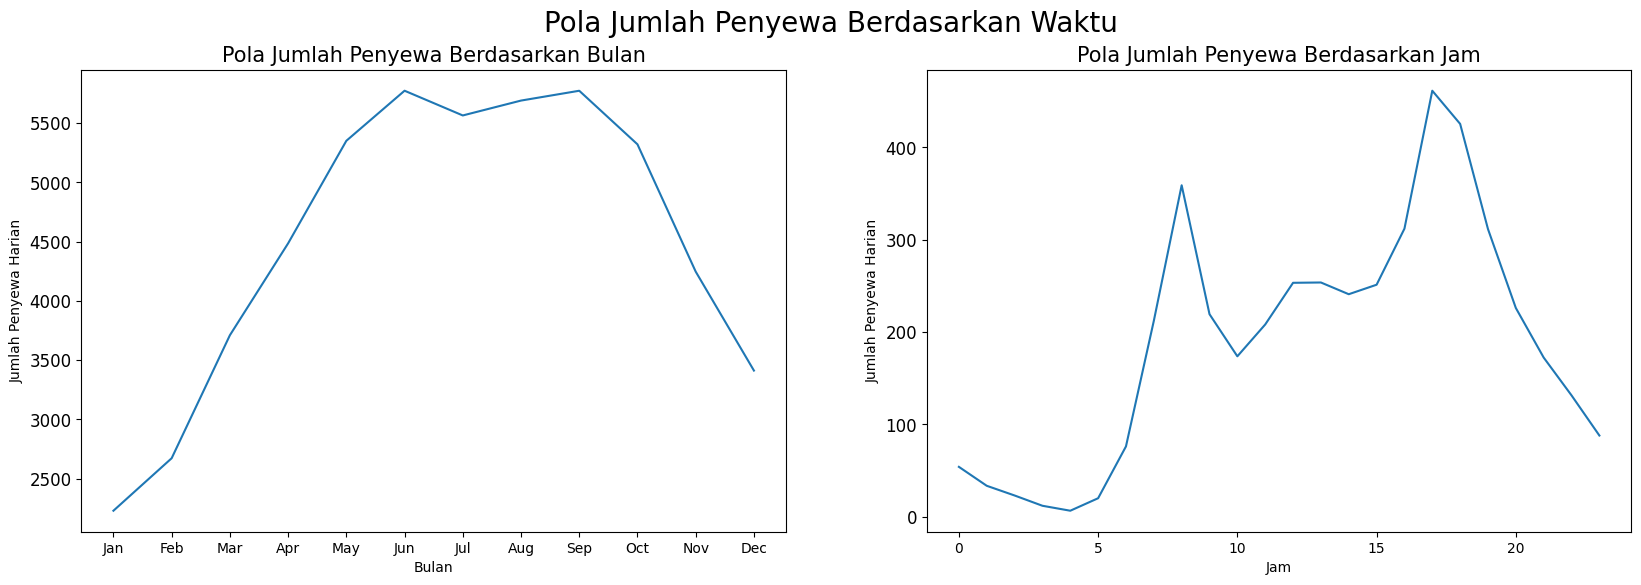

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.lineplot(x="mnth_day", y="cnt_day", data=all_df, ci=None,ax=ax[0])
sns.lineplot(x="hr", y="cnt_hour", data=all_df, ci=None,ax=ax[1])
ax[0].set_ylabel("Jumlah Penyewa Harian")
ax[0].set_xlabel("Bulan")
ax[0].set_title("Pola Jumlah Penyewa Berdasarkan Bulan",loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)
ax[1].set_ylabel("Jumlah Penyewa Harian")
ax[1].set_xlabel("Jam")
ax[1].set_title("Pola Jumlah Penyewa Berdasarkan Jam",loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Pola Jumlah Penyewa Berdasarkan Waktu", fontsize=20)
plt.show()

**Insight:**
- Dari grafik sebelah kiri diatas terlihat jumlah penyewa paling banyak ada pada bulan 6 dan 9, dan jumlah penyewa paling dikit ada pada bulan 1.
- Dari grafik sebelah kanan diatas terlihat jumlah penyewa paling banyak ada pada jam 5 sore.

Membuat dataset csv dari ```all_df```

In [41]:
all_df.to_csv("all_data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2